# Prediction of Machine Failure

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Analysis

#### Data feature 설명  
footfall: 기계 주변을 지나가는 사람이나 물체의 수.  
tempMode: 기계의 온도 모드 또는 설정.  
AQ: 기계 주변의 대기 질 지수.  
USS: 초음파 센서 데이터, 근접 측정값을 나타냄.  
CS: 전류 센서 판독값, 기계의 전기 사용량을 나타냄.  
VOC: 기계 주변의 휘발성 유기 화합물 수준.  
RP: 기계 부품의 회전 위치 또는 분당 회전수 (RPM).  
IP: 기계의 입력 압력.  
Temperature: 기계의 작동 온도.  
fail: 기계 고장 여부를 나타내는 이진 지표 (고장은 1, 정상은 0).  

In [2]:
data = pd.read_csv('./data.csv')

In [95]:
data.isna().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

결측치가 없는 것을 확인

In [5]:
data_x = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [6]:
data_x.shape

(944, 9)

In [7]:
data_x.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000


footfall의 경우 std가 너무 크기 때문에 데이터 분포를 확인해본다

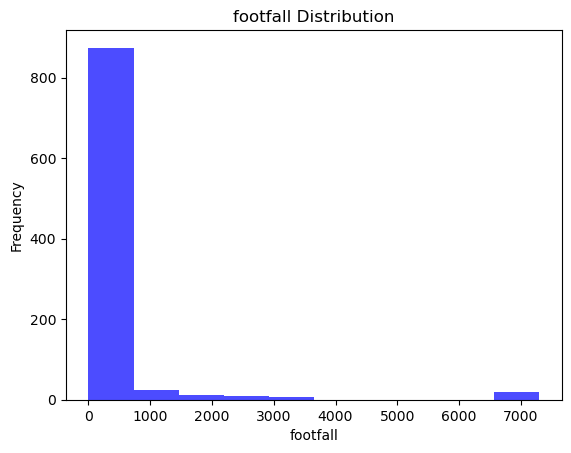

In [8]:
plt.hist(data_x['footfall'], bins=10, color='blue', alpha=0.7)
plt.title('footfall Distribution')
plt.xlabel('footfall')
plt.ylabel('Frequency')
plt.show()

특정 데이터만 과도하게 큰 이상치가 존재하기 때문에 제거 유무를 판별해본다

In [9]:
data[data['footfall']>=6000]

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
115,7300,5,7,7,6,3,21,2,8,0
125,7300,5,3,4,3,3,36,4,8,0
130,7300,1,2,2,7,3,27,6,9,0
161,7300,3,5,3,6,1,19,4,11,0
249,7300,3,2,2,6,0,37,4,14,0
288,7300,7,4,2,4,4,63,6,15,1
399,7300,2,3,3,4,0,62,4,16,0
423,7300,0,4,2,6,3,79,4,17,0
462,7300,1,6,3,6,6,32,3,17,1
515,7300,7,4,4,7,0,44,5,18,0


이상치로서 존재하는 데이터의 경우 예측하고자 하는 fail과 관련이 커보이지 않기 때문에  
우선 제거하지 않고 진행한 후 결과에 너무 큰 영향을 미칠 경우 추후 제거하고 예측을 진행한다.

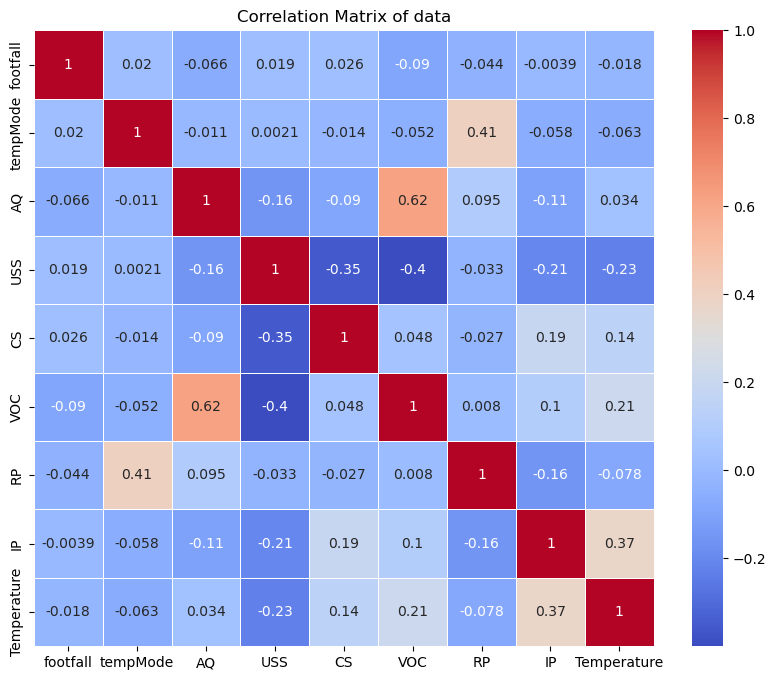

In [10]:
cor_mat = data_x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of data')
plt.show()

Feature간의 상관성을 확인해본 결과 AQ 와 voc의 상관성이 0.62로서 높았고  
다른 feature들 간의 연관성은 크게 확인되지 않는다.  
따라서 예측력이 떨어질 경우 VOC와 AQ 중 하나를 제거한 채 진행해 본다.  
AQ : 기계 주변의 대기 질 지수.  
VOC : 기계 주변의 유기 화합물 수준.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 데이터 표준화
standardized_data_x = scaler.fit_transform(data_x)
data_s_x = pd.DataFrame(standardized_data_x, columns = data_x.columns)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_s_x, data_y, test_size=0.2, random_state=0)